In [1]:
import pystan
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import stanity
import janitor

In [2]:
sns.set(rc={'figure.figsize':(14, 10)})

In [3]:
df = pd.read_csv('data/glm_seatbelts.csv', index_col=0)

In [4]:
df

,date,deaths,petrol,month
1,1969.000000,2.029384,0.102972,1
2,1969.083333,1.986772,0.102363,2
3,1969.166667,2.008600,0.102062,3
4,1969.250000,1.939519,0.100873,4
5,1969.333333,2.075547,0.101020,5
...,...,...,...,...
188,1984.583333,1.982271,0.114797,8
189,1984.666667,2.086360,0.114093,9
190,1984.750000,2.079181,0.116466,10
191,1984.833333,2.136721,0.116026,11


## 19.1.1

<AxesSubplot:xlabel='date', ylabel='deaths'>

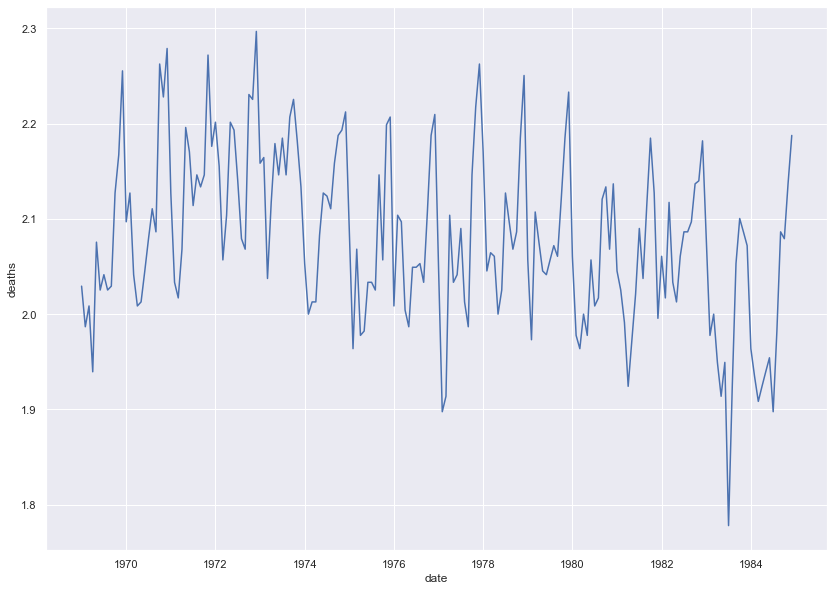

In [5]:
sns.lineplot(data=df, x='date', y='deaths')

## 19.1.2

TODO

## 19.1.3

TODO

## 19.2.1

In [6]:
df = pd.read_csv('data/glm_metaAnalysis.csv', index_col=0)
df

,x
1,6
2,4
3,9
4,7
5,3
6,2
7,10
8,5
9,7
10,3


<AxesSubplot:>

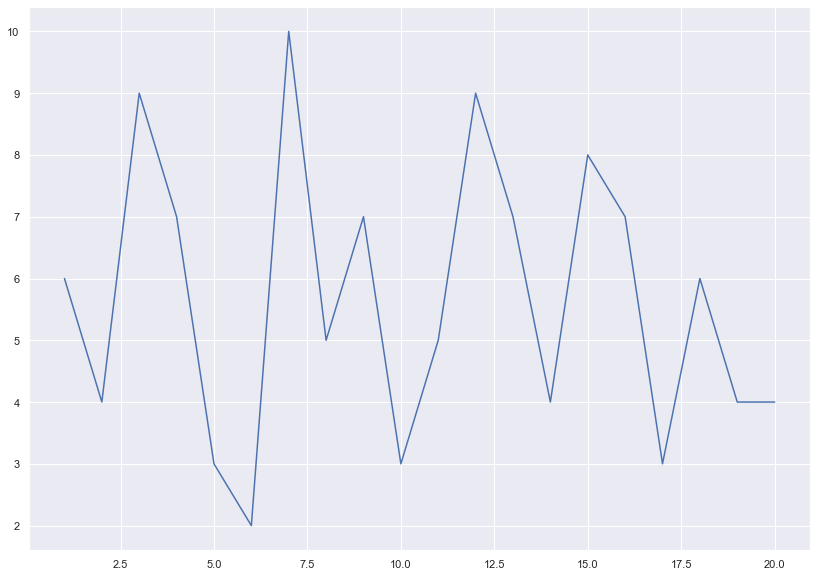

In [7]:
df.x.plot()

In [8]:
data = {'N': df.shape[0], 'trials': df.x.values}
data

{'N': 20,
 'trials': array([ 6,  4,  9,  7,  3,  2, 10,  5,  7,  3,  5,  9,  7,  4,  8,  7,  3,
         6,  4,  4], dtype=int64)}

## 19.2.2

In [9]:
ocode = '''
data {
    int N;
    int trials[N];
}

parameters {
    real<lower=0, upper=1> theta;
}

model {
    trials ~ binomial(10, theta);
    theta ~ beta(1, 1);
}

generated quantities{
    real logLikelihood[N];
    for(i in 1:N)
        logLikelihood[i] = binomial_lpmf(trials[i] | 10, theta);
}

'''
sm_binom = pystan.StanModel(model_code=ocode)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_d851a58e6c9931f4f4e51c00464fbb20 NOW.


In [10]:
fit_binom = sm_binom.sampling(data=data, iter=1000, chains=4, seed=1)
fit_binom

Inference for Stan model: anon_model_d851a58e6c9931f4f4e51c00464fbb20.
4 chains, each with iter=1000; warmup=500; thin=1; 
post-warmup draws per chain=500, total post-warmup draws=2000.

                    mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
theta               0.56  1.2e-3   0.03   0.49   0.54   0.56   0.59   0.63    793    1.0
logLikelihood[1]   -1.44  2.1e-3   0.06  -1.61  -1.46  -1.41  -1.39  -1.38    879    1.0
logLikelihood[2]   -1.94  8.2e-3   0.23  -2.45  -2.08  -1.92  -1.77  -1.56    789    1.0
logLikelihood[3]   -3.72    0.02   0.48  -4.74  -4.03  -3.69  -3.38  -2.87    798    1.0
logLikelihood[4]   -1.74  6.9e-3    0.2   -2.2  -1.86  -1.72   -1.6  -1.43    808    1.0
logLikelihood[5]   -2.76    0.01   0.37  -3.54  -2.99  -2.73  -2.49  -2.09    790    1.0
logLikelihood[6]   -3.99    0.02   0.51  -5.04  -4.32  -3.97  -3.63  -3.04    790    1.0
logLikelihood[7]   -5.77    0.02   0.62  -7.07  -6.17  -5.74  -5.34  -4.65    796    1.0
logLikelihoo

In [11]:
loo_binom = stanity.psisloo(fit_binom.extract()['logLikelihood'])
loo_binom.elpd

-49.606374305109966

In [12]:
ocode = '''
data {
    int N;
    int trials[N];
}

parameters {
    real a;
    real b;
}

model {
    trials ~ beta_binomial(10, a, b);
    a ~ normal(2, 5);
    b ~ normal(2, 5);
}

generated quantities{
    real logLikelihood[N];
    for(i in 1:N)
        logLikelihood[i] = beta_binomial_lpmf(trials[i] | 10, a, b);
}


'''
sm_betabinom = pystan.StanModel(model_code=ocode)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_227cc875ad70ae16ef4f122629bb4dcf NOW.


In [13]:
fit_betabinom = sm_betabinom.sampling(data=data, iter=1000, chains=4, seed=1)
fit_betabinom

Inference for Stan model: anon_model_227cc875ad70ae16ef4f122629bb4dcf.
4 chains, each with iter=1000; warmup=500; thin=1; 
post-warmup draws per chain=500, total post-warmup draws=2000.

                    mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
a                   5.58    0.12   2.27   1.99   3.85   5.34   7.14  10.58    337   1.01
b                   4.28     0.1    1.8   1.52   2.91   4.06   5.44   8.25    354   1.01
logLikelihood[1]   -1.81  7.0e-3   0.13  -2.12  -1.89  -1.79  -1.71  -1.63    348   1.01
logLikelihood[2]   -2.08  6.2e-3   0.18  -2.46  -2.19  -2.06  -1.95  -1.77    824    1.0
logLikelihood[3]   -2.68    0.01   0.39  -3.53  -2.93  -2.65  -2.39  -2.01    717   1.01
logLikelihood[4]    -1.9  5.9e-3   0.15  -2.22   -2.0  -1.88  -1.79  -1.65    641    1.0
logLikelihood[5]   -2.44  7.3e-3   0.25  -2.99  -2.59  -2.42  -2.25  -2.01   1195    1.0
logLikelihood[6]   -2.99    0.01   0.39  -3.83  -3.24  -2.95   -2.7  -2.31    731    1.0
logLikelihoo

In [14]:
loo_betabinom = stanity.psisloo(fit_betabinom.extract()['logLikelihood'])
loo_betabinom.elpd

-45.522905798657966

In [15]:
stanity.loo_compare(loo_binom, loo_betabinom)

{'diff': 4.083468506451998, 'se_diff': 2.8499296301271846}

### 19.2.3

In [16]:
ocode = '''
data {
    int N;
    int trials[N];
}

parameters {
    real a;
    real b;
    real<lower=0, upper=1> theta;
}

transformed parameters{
    vector[2] lp;
    lp[1] = log(0.5) + binomial_lpmf(trials | 10, theta);
    lp[2] = log(0.5) + beta_binomial_lpmf(trials | 10, a, b);
}

model {
    target += log_sum_exp(lp);
    a ~ normal(2, 5);
    b ~ normal(2, 5);
    theta ~ beta(1, 1);
}

generated quantities{
    vector[2] p;
    p = exp(lp - log_sum_exp(lp));
}


'''
sm_both = pystan.StanModel(model_code=ocode)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_6a09b0e7edcdeb0c9e6572dbb0ba3204 NOW.


In [17]:
fit_both = sm_both.sampling(data=data, iter=1000, chains=4, seed=1)
fit_both

Inference for Stan model: anon_model_6a09b0e7edcdeb0c9e6572dbb0ba3204.
4 chains, each with iter=1000; warmup=500; thin=1; 
post-warmup draws per chain=500, total post-warmup draws=2000.

        mean se_mean     sd     2.5%     25%     50%    75%  97.5%  n_eff   Rhat
a       5.53    0.13   2.28     2.11    3.87    5.18   6.82  11.03    321   1.01
b       4.17     0.1   1.78     1.63    2.87    3.91   5.11   8.43    344   1.01
theta   0.49  9.3e-3   0.28     0.02    0.25     0.5   0.73   0.98    929    1.0
lp[1] -113.2    5.04  98.41   -392.3  -131.5  -75.03 -54.06  -48.8    381   1.01
lp[2] -45.74    0.24   1.88   -49.05   -45.8  -45.29 -44.96 -44.75     61   1.06
p[1]    0.03    0.02   0.14 1.5e-151 4.4e-38 1.4e-13 1.8e-4   0.17     50   1.09
p[2]    0.97    0.02   0.14     0.83     1.0     1.0    1.0    1.0     50   1.09
lp__  -48.09     0.1   1.52   -51.89  -48.73  -47.69 -46.98 -46.34    245   1.01

Samples were drawn using NUTS at Mon Jul 12 23:41:06 2021.
For each parameter, n_ef

## 19.3.1

In [18]:
df = pd.read_csv('data/glm_terrorism.csv', index_col=0).clean_names()
df

,country_txt,count,gdp,population,gdppercapita,religion,ethnic,language,law,corruption,democracy,autocracy,region,region_numeric
1,Afghanistan,6656,1.933100e+10,32526562,594.314272,0.2717,0.7693,0.6141,-1.672525,-1.432677,1,2,Asia,1
2,Albania,7,1.139800e+10,2889167,3945.081748,0.4719,0.2204,0.0399,-0.548157,-0.701515,9,0,Europe,2
3,Algeria,92,1.668390e+11,39666519,4206.040868,0.0091,0.3394,0.4427,-0.658459,-0.471443,3,1,Middle East & North Africa,3
4,Argentina,5,5.831690e+11,43416755,13431.888219,0.2236,0.2550,0.0618,-0.732617,-0.462757,9,0,South America,5
5,Armenia,3,1.052900e+10,3017712,3489.067214,0.4576,0.1272,0.1291,-0.316484,-0.461841,5,0,Asia,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,Ukraine,1541,9.061500e+10,45198200,2004.836476,0.6157,0.4737,0.4741,-0.818289,-1.094172,5,1,Europe,2
124,United Kingdom,406,2.858003e+12,65138232,43875.968264,0.6944,0.1211,0.0532,1.684359,1.694164,10,0,Europe,2
125,United States,100,1.803665e+13,321418820,56115.718426,0.8241,0.4901,0.2514,1.546544,1.293073,10,0,North America,4
126,Uzbekistan,1,6.673300e+10,31299500,2132.078787,0.2133,0.4125,0.4120,-1.198077,-1.225589,0,9,Asia,1


In [19]:
df_logged = df.copy()
df_logged['count'] = df_logged['count'].log()
df_logged['gdp'] = df_logged['gdp'].log() 
df_logged['population'] = df_logged['population'].log() 

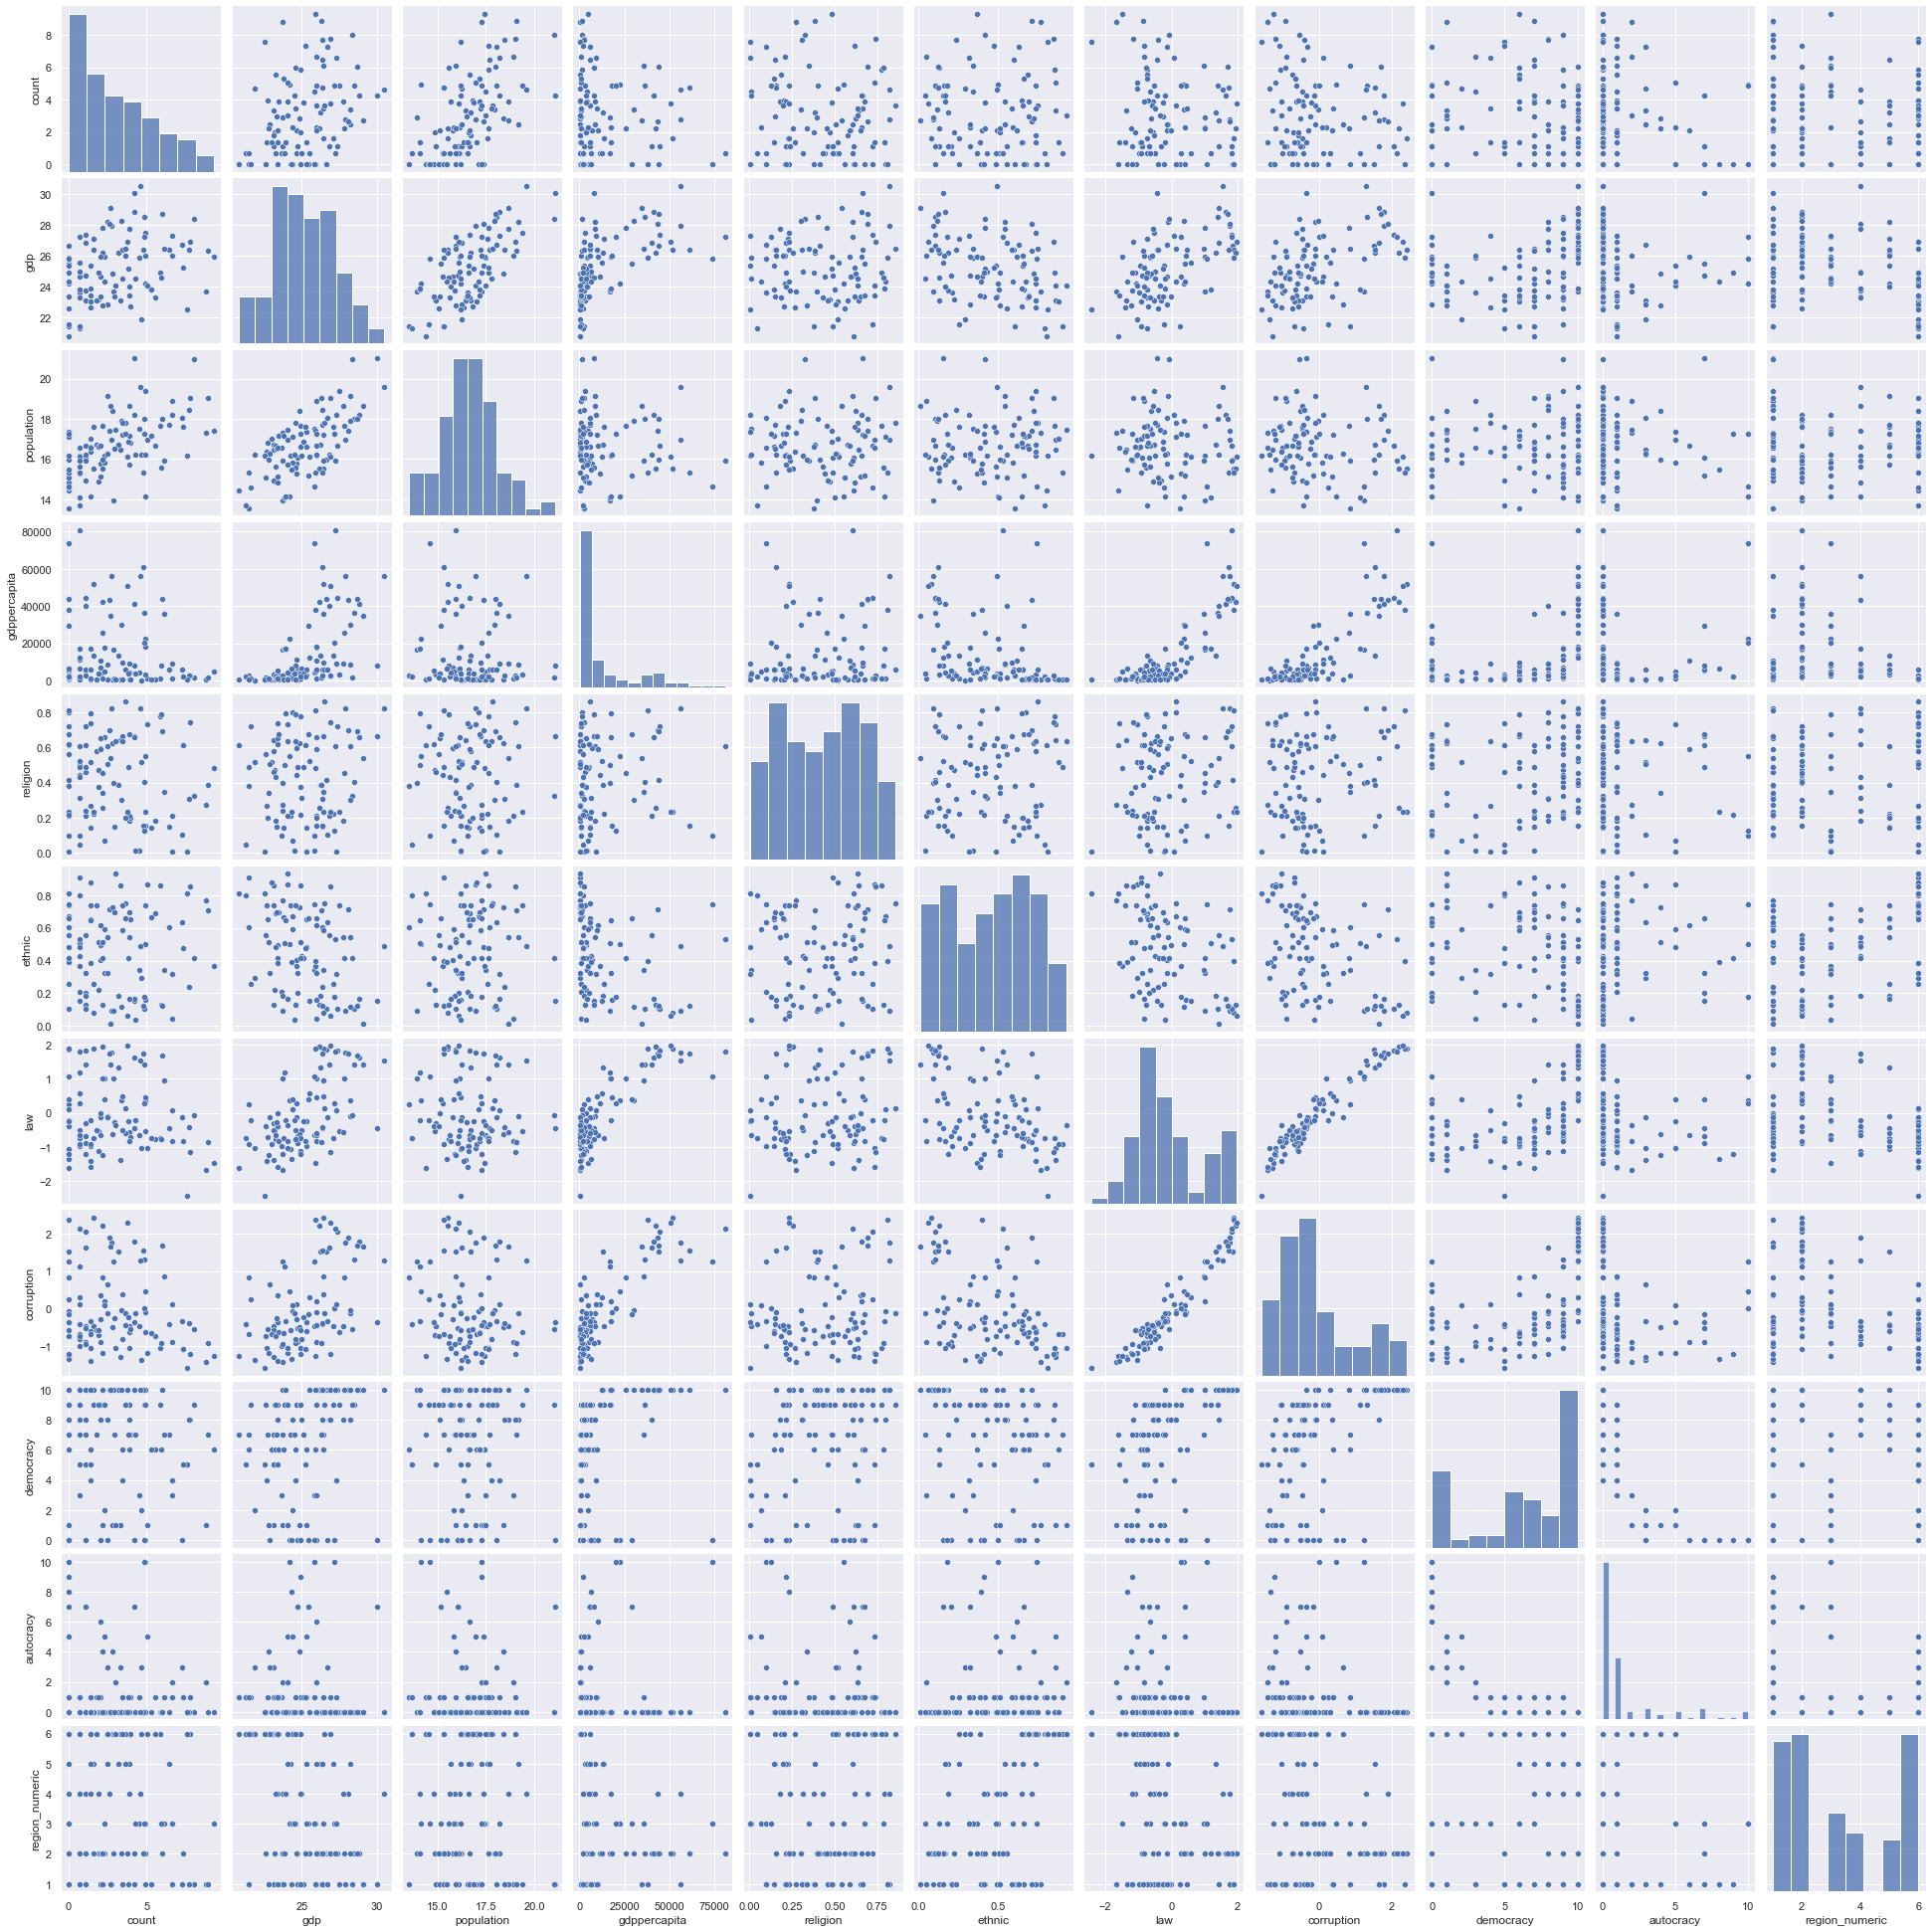

In [20]:
sns.pairplot(data=df_logged)

### 19.3.2

In [21]:
ocode = '''
data {
    int N;
    real population[N];
    real gdpPerCapita[N];
    int count[N];
}

parameters {
    real a;
    real b_pop;
    real b_gdp;
}

model {
    for(i in 1:N){
        count[i] ~ poisson(a+b_pop*population[i]+b_gdp*gdpPerCapita[i]);
    }
}

generated quantities{

}


'''
sm_terr_1 = pystan.StanModel(model_code=ocode)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_2acd5649e278537cc1a4f1f276039bf4 NOW.


In [22]:
data1 = {
    'N': df.shape[0],
    'count': df['count'].values,
    'population': df['population'].log().values,
    'gdpPerCapita': df['gdppercapita'].log().values
}

In [23]:
fit_terr1 = sm_terr_1.sampling(data=data1, iter=10000, chains=8, seed=1,  control=dict(adapt_delta=0.95))
fit_terr1

Inference for Stan model: anon_model_2acd5649e278537cc1a4f1f276039bf4.
8 chains, each with iter=10000; warmup=5000; thin=1; 
post-warmup draws per chain=5000, total post-warmup draws=40000.

        mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
a      -1282   28.25 124.28  -1335  -1313  -1303  -1294 -877.7     19    1.5
b_pop 134.22    1.32   5.66 114.73  134.7 135.25 135.78 136.81     18   1.56
b_gdp  -60.5    0.81   3.84 -71.33 -60.44 -59.97 -59.43 -58.19     22   1.37
lp__   2.4e5   38.41 186.34  2.4e5  2.4e5  2.4e5  2.4e5  2.4e5     24   1.36

Samples were drawn using NUTS at Mon Jul 12 23:43:37 2021.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).

### 19.3.3

In [24]:
ocode = '''
data {
    int N;
    real population[N];
    real gdpPerCapita[N];
    real religion[N];
    real ethnic[N];
    real corruption[N];
    int count[N];
}

parameters {
    real a;
    real b_pop;
    real b_gdp;
    real b_cor;
    real b_eth;
    real b_rel;
}

model {
    for(i in 1:N){
        count[i] ~ poisson(a + b_pop*population[i] + b_gdp*gdpPerCapita[i] + b_cor*corruption[i] + b_eth*ethnic[i] + b_rel*religion[i]);
    }
}

generated quantities{

}


'''
sm_terr_2 = pystan.StanModel(model_code=ocode)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_8b86cad215a67e3eddc3f6dcb2e786ab NOW.


In [25]:
data2 = {
    'N': df.shape[0],
    'count': df['count'].values,
    'population': df['population'].log().values,
    'gdpPerCapita': df['gdppercapita'].log().values,
    'religion': df['religion'].values,
    'ethnic': df['ethnic'].values,
    'corruption': df['corruption'].values
}

In [26]:
fit_terr2 = sm_terr_2.sampling(data=data2, iter=10000, chains=8, seed=1,  control=dict(adapt_delta=0.95))
fit_terr2

Inference for Stan model: anon_model_8b86cad215a67e3eddc3f6dcb2e786ab.
8 chains, each with iter=10000; warmup=5000; thin=1; 
post-warmup draws per chain=5000, total post-warmup draws=40000.

        mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
a      -1228    3.27  34.39  -1267  -1236  -1229  -1223  -1210    111   1.02
b_pop 111.33    0.18    1.1 109.55 110.72 111.26 111.78 114.05     36   1.22
b_gdp -19.13    0.38    3.3  -19.8  -19.2 -18.89  -18.5 -17.38     77   1.08
b_cor -104.2    0.93    4.5 -107.3 -105.8 -104.9 -104.0 -96.46     23   1.37
b_eth  -63.4    1.12   5.67 -67.55 -65.76  -64.5 -62.85  -51.6     25   1.34
b_rel  -7.38    3.15  13.02 -52.75  -8.88  -4.35  -0.59   4.18     17   1.76
lp__   2.4e5    6.71   49.1  2.4e5  2.4e5  2.4e5  2.4e5  2.4e5     54   1.11

Samples were drawn using NUTS at Mon Jul 12 23:46:27 2021.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chai